# Hands On Classification MNIST with ANN

In [59]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.datasets import mnist
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt

### Load Data 

In [60]:
num_classes = 10
input_shape = (28, 28)


with np.load("../dataset/mnist.npz") as data:
  x_train = data['x_train']
  y_train = data['y_train']
  x_test = data['x_test']
  y_test = data['y_test']

In [61]:
x_train.shape

(60000, 28, 28)

In [62]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

### Data Visualization

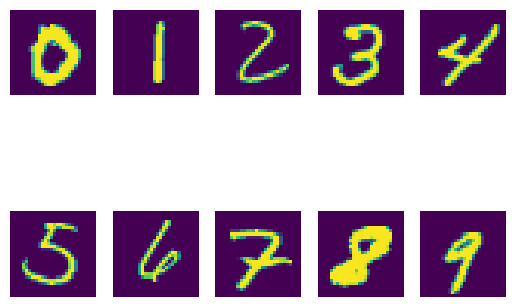

In [63]:
fig = plt.figure()
for y in range(num_classes):
    idx = np.random.choice(np.where(y_train==y)[0])
    sample = x_train[idx]
    a = fig.add_subplot(2, num_classes//2, y + 1)
    plt.imshow(sample)
    plt.axis('off')
    if idx == 0:
        a.set_title('label={}'.format(y))

### Prepare Data

In [64]:
# Normalize
x_train = x_train.astype("float32") / 255
x_train = x_train.reshape(x_train.shape[0], input_shape[0]*input_shape[1])
x_test = x_test.astype("float32") / 255
x_test = x_test.reshape(x_test.shape[0], input_shape[0]*input_shape[1])

### Build Model

In [65]:
clf = MLPClassifier(hidden_layer_sizes=10,
                    activation="relu",
                    solver='adam',
                    max_iter=10)

### Train Data

In [52]:
clf.fit(x_train, y_train)

c:\Users\nia1ct\Desktop\repositorio\TreinamentoVisaoComputacional\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=10, max_iter=10)

### Evaluate Model  on test set

In [53]:
def score_accuracy(clf, x_test, y_test):
    model_name = str(clf.__class__).strip("<>").split(".")[-1]
    preds = clf.predict(x_test)
    accuracy = np.sum(y_test == preds)/len(y_test)*100
    print(f"Classification {model_name} Accuracy : {accuracy}%")

score_accuracy(clf, x_test, y_test)

Classification MLPClassifier' Accuracy : 92.53%


### Confusion Matrix

c:\Users\nia1ct\Desktop\repositorio\TreinamentoVisaoComputacional\.venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


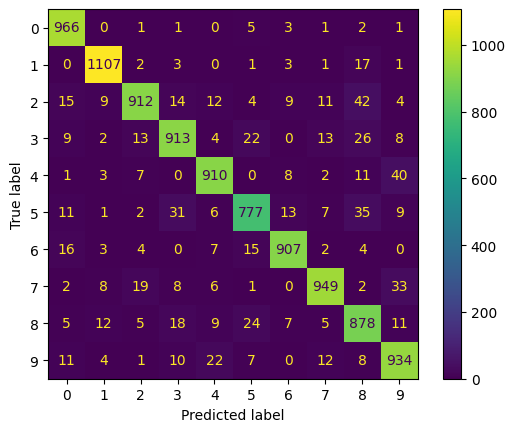

In [54]:
plot_confusion_matrix(clf, x_test, y_test)

### Compare against other model configurations

In [55]:
clf.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': 10,
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 10,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#

In [56]:
clf = MLPClassifier(hidden_layer_sizes=25,
                    activation="tanh",
                    solver='sgd',
                    max_iter=10)
clf.fit(x_train, y_train)
score_accuracy(clf, x_test, y_test)

Classification MLPClassifier' Accuracy : 90.14%


c:\Users\nia1ct\Desktop\repositorio\TreinamentoVisaoComputacional\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


### Compare agains other model functions

#### SVC (Support Vector Machines for Classification)


In [57]:
svm = SVC(kernel="rbf", 
          max_iter=10)
svm.fit(x_train, y_train)

score_accuracy(svm, x_test, y_test)

c:\Users\nia1ct\Desktop\repositorio\TreinamentoVisaoComputacional\.venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Classification SVC' Accuracy : 66.32000000000001%


#### RF (Random Forests Classifier)

In [58]:
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(x_train, y_train)

score_accuracy(rfc, x_test, y_test)

Classification RandomForestClassifier' Accuracy : 94.82000000000001%
